In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from scipy import stats

In [3]:
# Read in data
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)
y=y["Perf"]

In [4]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

pl_linear = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())
])
pl_linear.fit(x, y)
y_pred = pl_linear.predict(x)
print('train mse: ', mean_squared_error(y, pl_linear.predict(x)))
print('train rmse: ', mean_squared_error(y, pl_linear.predict(x), squared = False))
print('Training set score:',  format(pl_linear.score(x, y)))

train mse:  1.5987381113317638
train rmse:  1.2644121603859098
Training set score: 0.011204659338240441


In [5]:
pl_linear = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())
])
pl_linear.fit(x, y)
params = np.append(pl_linear['linear'].intercept_,pl_linear['linear'].coef_)
predictions = pl_linear.predict(x)

newX = np.append(np.ones((len(pl_linear['Power Transformer'].fit_transform(x)),1)), pl_linear['Power Transformer'].fit_transform(x), axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0         0.2136            0.009    22.977          0.000
1        -0.0116            0.010    -1.199          0.230
2         0.0120            0.010     1.164          0.244
3        -0.0030            0.010    -0.315          0.753
4         0.0287            0.012     2.434          0.015
5        -0.0944            0.012    -8.088          0.000
6        -0.0065            0.010    -0.670          0.503
7        -0.0087            0.023    -0.374          0.708
8         0.0201            0.010     1.983          0.047
9         0.0233            0.015     1.570          0.116
10       -0.0509            0.015    -3.402          0.001
11       -0.0203            0.077    -0.263          0.792
12        0.0692            0.017     4.134          0.000
13        0.0001            0.009     0.015          0.988
14        0.0114            0.010     1.127          0.260
15       -0.0233            0.021    -1.102          0.2

In [6]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(x))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.65
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.93e-34
Time:                        13:09:41   Log-Likelihood:                -30624.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18501   BIC:                         6.143e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.977      0.000       0.195       0.232
x1            -0.0116      0.010     -1.199      0.230      -0.031       0.007
x2             0.0120      0.010      1.164      0.244      -0.008       0.032
x3            -0.0030      0.010     -0.315      0.753      -0.022       0.016
x4             0.0287      0.012      2.434      0.015       0.006       0.052
x5            -0.0944      0.012     -8.088      0.000      -0.117      -0.071
x6            -0.0065      0.010     -0.670      0.503      -0.025       0.012
x7            -0.0087      0.023     -0.374      0.708      -0.054       0.037
x8             0.0201      0.010      1.983      0.047       0.000       0.040
x9             0.0233      0.015      1.570      0.116      -0.006       0.052
x10           -0.0509      0.015     -3.402      0.001      -0.080      -0.022
x11           -0.0203      0.077     -0.263      0.792      -0.172       0.131
x12            0.0692      0.017      4.134      0.000       0.036       0.102
x13            0.0001      0.009      0.015      0.988      -0.018       0.018
x14            0.0114      0.010      1.127      0.260      -0.008       0.031
x15           -0.0233      0.021     -1.102      0.271      -0.065       0.018
x16           -0.0514      0.012     -4.372      0.000      -0.074      -0.028
x17           -0.0976      0.015     -6.395      0.000      -0.127      -0.068
x18           -0.0232      0.075     -0.311      0.756      -0.170       0.123
==============================================================================
Omnibus:                    52297.762   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3271741564.527
Skew:                          37.158   Prob(JB):                         0.00
Kurtosis:                    2060.745   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
xy = x.join(y)

In [8]:
xy

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315,0.764005
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135,0.373311
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929,-0.152369
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356,0.185295
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978,0.416215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574,-0.247917
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825,0.268698
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283,-0.008791
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831,1.337917


In [9]:
corr = xy.corr()

In [10]:
corr

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
EV/EBIT,1.000000,0.043279,0.239020,0.004569,-0.041735,-0.081355,-0.029747,0.053181,0.031722,-0.000123,-0.015648,-0.039416,-0.008428,0.026831,-0.056645,0.058921,0.094889,-0.017862,-0.019762
Op. In./(NWC+FA),0.043279,1.000000,0.033841,-0.013010,-0.174538,-0.144313,-0.108650,0.215018,0.333646,0.014112,-0.074454,-0.126479,-0.005969,0.079782,-0.178647,0.252308,0.357256,-0.086014,-0.016440
P/E,0.239020,0.033841,1.000000,0.021336,-0.026380,-0.054231,-0.017257,0.035656,0.039253,-0.009207,0.000494,-0.023247,-0.007692,0.033694,-0.026377,0.044050,0.074031,0.002003,-0.011953
P/B,0.004569,-0.013010,0.021336,1.000000,0.044849,0.029149,0.002667,0.097643,0.023172,0.608756,-0.021826,0.022094,-0.011838,0.075106,0.053712,-0.014635,0.016543,-0.025210,-0.004710
P/S,-0.041735,-0.174538,-0.026380,0.044849,1.000000,0.187629,0.366027,-0.116990,-0.011536,-0.042357,0.310883,0.449240,-0.003427,-0.174903,0.233466,-0.307321,-0.420748,0.309939,0.006691
Op. In./Interest Expense,-0.081355,-0.144313,-0.054231,0.029149,0.187629,1.000000,0.117149,-0.105583,-0.084923,-0.016378,0.101262,0.145130,-0.005531,-0.064023,0.142888,-0.163764,-0.237027,0.113777,0.018121
Working Capital Ratio,-0.029747,-0.108650,-0.017257,0.002667,0.366027,0.117149,1.000000,-0.064961,-0.070364,-0.105691,0.745425,0.922949,0.101241,-0.076268,0.685387,-0.093231,-0.125099,0.752574,-0.005238
RoE,0.053181,0.215018,0.035656,0.097643,-0.116990,-0.105583,-0.064961,1.000000,0.272206,0.089179,-0.035065,-0.091609,-0.003639,0.032426,-0.118622,0.209092,0.322815,-0.040936,-0.004943
ROCE,0.031722,0.333646,0.039253,0.023172,-0.011536,-0.084923,-0.070364,0.272206,1.000000,-0.010043,-0.044321,-0.075305,0.040630,0.043841,-0.146828,-0.033309,0.246796,-0.048998,0.005655
Debt/Equity,-0.000123,0.014112,-0.009207,0.608756,-0.042357,-0.016378,-0.105691,0.089179,-0.010043,1.000000,-0.134161,-0.087721,0.017170,-0.020007,-0.117841,-0.003789,0.002104,-0.160555,0.005709


In [13]:
import seaborn as sns

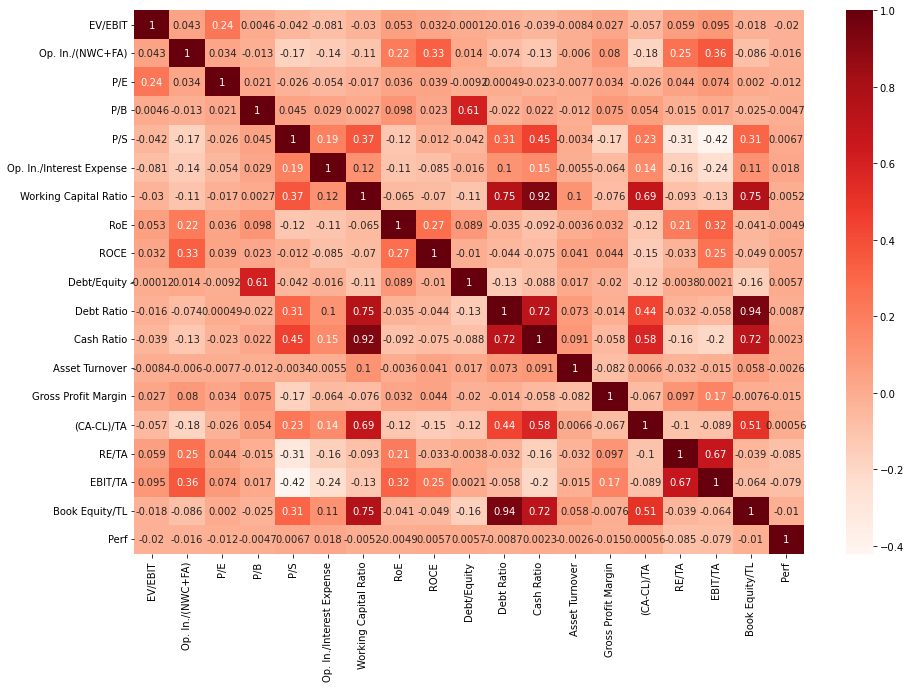

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = xy.columns[columns]
data = xy[selected_columns]

In [13]:
data

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Perf
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,7.007282,0.553516,0.264307,0.398316,0.117739,0.764005
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,5.302959,0.511493,0.372832,0.362585,0.008671,0.373311
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,5.555102,0.538207,0.318276,0.355198,0.079208,-0.152369
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,6.575547,0.533485,0.412057,0.491995,0.121895,0.185295
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,5.891753,0.525518,0.259681,0.522494,0.107726,0.416215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,0.231206,0.000000,0.850020,-1.751025,-0.607070,-0.247917
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,0.000000,0.000000,0.854534,-1.718639,-0.392706,0.268698
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,124.638298,0.794341,0.486505,-0.270019,1.000000,-0.008791
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,38.970696,0.810822,0.381331,0.252662,0.538673,1.337917


In [14]:
data.columns

Index(['EV/EBIT', 'Op. In./(NWC+FA)', 'P/E', 'P/B', 'P/S',
       'Op. In./Interest Expense', 'Working Capital Ratio', 'RoE', 'ROCE',
       'Debt/Equity', 'Debt Ratio', 'Asset Turnover', 'Gross Profit Margin',
       '(CA-CL)/TA', 'RE/TA', 'EBIT/TA', 'Perf'],
      dtype='object')

In [19]:
for count, item in enumerate(data):
  print(count, item)

0 EV/EBIT
1 Op. In./(NWC+FA)
2 P/E
3 P/B
4 P/S
5 Op. In./Interest Expense
6 Working Capital Ratio
7 RoE
8 ROCE
9 Debt/Equity
10 Debt Ratio
11 Asset Turnover
12 Gross Profit Margin
13 (CA-CL)/TA
14 RE/TA
15 EBIT/TA
16 Perf


In [20]:
data.drop('Perf', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
data

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,7.007282,0.553516,0.264307,0.398316,0.117739
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,5.302959,0.511493,0.372832,0.362585,0.008671
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,5.555102,0.538207,0.318276,0.355198,0.079208
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,6.575547,0.533485,0.412057,0.491995,0.121895
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,5.891753,0.525518,0.259681,0.522494,0.107726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,0.231206,0.000000,0.850020,-1.751025,-0.607070
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,0.000000,0.000000,0.854534,-1.718639,-0.392706
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,124.638298,0.794341,0.486505,-0.270019,1.000000
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,38.970696,0.810822,0.381331,0.252662,0.538673


In [23]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.01
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           4.50e-32
Time:                        17:28:25   Log-Likelihood:                -30632.
No. Observations:               18520   AIC:                         6.130e+04
Df Residuals:                   18503   BIC:                         6.143e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.968      0.000       0.195       0.232
x1            -0.0130      0.010     -1.342      0.179      -0.032       0.006
x2             0.0109      0.010      1.055      0.291      -0.009       0.031
x3            -0.0033      0.010     -0.342      0.733      -0.022       0.016
x4             0.0320      0.012      2.726      0.006       0.009       0.055
x5            -0.0778      0.011     -7.101      0.000      -0.099      -0.056
x6            -0.0085      0.010     -0.883      0.377      -0.027       0.010
x7             0.0301      0.021      1.415      0.157      -0.012       0.072
x8             0.0190      0.010      1.875      0.061      -0.001       0.039
x9             0.0229      0.015      1.544      0.123      -0.006       0.052
x10           -0.0584      0.015     -4.007      0.000      -0.087      -0.030
x11           -0.0422      0.014     -2.999      0.003      -0.070      -0.015
x12            0.0003      0.009      0.034      0.973      -0.018       0.019
x13            0.0161      0.010      1.605      0.109      -0.004       0.036
x14           -0.0164      0.021     -0.780      0.436      -0.058       0.025
x15           -0.0559      0.012     -4.802      0.000      -0.079      -0.033
x16           -0.0993      0.015     -6.508      0.000      -0.129      -0.069
==============================================================================
Omnibus:                    52295.939   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3269160174.034
Skew:                          37.155   Prob(JB):                         0.00
Kurtosis:                    2059.932   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
data.drop(data.columns[11], axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
for count, item in enumerate(data):
  print(count+1, item)

1 EV/EBIT
2 Op. In./(NWC+FA)
3 P/E
4 P/B
5 P/S
6 Op. In./Interest Expense
7 Working Capital Ratio
8 RoE
9 ROCE
10 Debt/Equity
11 Debt Ratio
12 Gross Profit Margin
13 (CA-CL)/TA
14 RE/TA
15 EBIT/TA


In [28]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.82
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.23e-32
Time:                        17:34:56   Log-Likelihood:                -30632.
No. Observations:               18520   AIC:                         6.130e+04
Df Residuals:                   18504   BIC:                         6.142e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.968      0.000       0.195       0.232
x1            -0.0130      0.010     -1.343      0.179      -0.032       0.006
x2             0.0109      0.010      1.055      0.291      -0.009       0.031
x3            -0.0033      0.010     -0.342      0.732      -0.022       0.016
x4             0.0320      0.012      2.726      0.006       0.009       0.055
x5            -0.0778      0.011     -7.105      0.000      -0.099      -0.056
x6            -0.0085      0.010     -0.885      0.376      -0.027       0.010
x7             0.0301      0.021      1.415      0.157      -0.012       0.072
x8             0.0190      0.010      1.875      0.061      -0.001       0.039
x9             0.0229      0.015      1.544      0.123      -0.006       0.052
x10           -0.0584      0.015     -4.007      0.000      -0.087      -0.030
x11           -0.0422      0.014     -3.000      0.003      -0.070      -0.015
x12            0.0161      0.010      1.607      0.108      -0.004       0.036
x13           -0.0164      0.021     -0.779      0.436      -0.058       0.025
x14           -0.0559      0.012     -4.806      0.000      -0.079      -0.033
x15           -0.0992      0.015     -6.510      0.000      -0.129      -0.069
==============================================================================
Omnibus:                    52295.905   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3269143730.568
Skew:                          37.155   Prob(JB):                         0.00
Kurtosis:                    2059.927   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
data.drop(data.columns[2], axis=1, inplace=True)

In [30]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     13.72
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           3.42e-33
Time:                        17:35:40   Log-Likelihood:                -30632.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18505   BIC:                         6.141e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.969      0.000       0.195       0.232
x1            -0.0138      0.009     -1.466      0.143      -0.032       0.005
x2             0.0109      0.010      1.056      0.291      -0.009       0.031
x3             0.0319      0.012      2.723      0.006       0.009       0.055
x4            -0.0779      0.011     -7.116      0.000      -0.099      -0.056
x5            -0.0084      0.010     -0.877      0.381      -0.027       0.010
x6             0.0302      0.021      1.421      0.155      -0.011       0.072
x7             0.0190      0.010      1.875      0.061      -0.001       0.039
x8             0.0227      0.015      1.534      0.125      -0.006       0.052
x9            -0.0584      0.015     -4.009      0.000      -0.087      -0.030
x10           -0.0423      0.014     -3.006      0.003      -0.070      -0.015
x11            0.0161      0.010      1.603      0.109      -0.004       0.036
x12           -0.0164      0.021     -0.781      0.435      -0.058       0.025
x13           -0.0560      0.012     -4.813      0.000      -0.079      -0.033
x14           -0.0992      0.015     -6.510      0.000      -0.129      -0.069
==============================================================================
Omnibus:                    52295.843   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3269097150.386
Skew:                          37.155   Prob(JB):                         0.00
Kurtosis:                    2059.913   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
data.drop(data.columns[11], axis=1, inplace=True)

In [32]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     14.73
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.16e-33
Time:                        17:36:10   Log-Likelihood:                -30633.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18506   BIC:                         6.140e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.969      0.000       0.195       0.232
x1            -0.0135      0.009     -1.443      0.149      -0.032       0.005
x2             0.0119      0.010      1.161      0.245      -0.008       0.032
x3             0.0313      0.012      2.673      0.008       0.008       0.054
x4            -0.0774      0.011     -7.084      0.000      -0.099      -0.056
x5            -0.0087      0.010     -0.902      0.367      -0.028       0.010
x6             0.0165      0.012      1.380      0.168      -0.007       0.040
x7             0.0197      0.010      1.949      0.051      -0.000       0.039
x8             0.0225      0.015      1.521      0.128      -0.006       0.051
x9            -0.0586      0.015     -4.023      0.000      -0.087      -0.030
x10           -0.0437      0.014     -3.134      0.002      -0.071      -0.016
x11            0.0163      0.010      1.624      0.104      -0.003       0.036
x12           -0.0549      0.012     -4.754      0.000      -0.078      -0.032
x13           -0.0996      0.015     -6.533      0.000      -0.129      -0.070
==============================================================================
Omnibus:                    52299.129   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3270568267.977
Skew:                          37.161   Prob(JB):                         0.00
Kurtosis:                    2060.375   Cond. No.                         3.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
data.drop(data.columns[4], axis=1, inplace=True)

In [34]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     15.89
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           4.15e-34
Time:                        17:36:44   Log-Likelihood:                -30633.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18507   BIC:                         6.139e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.969      0.000       0.195       0.232
x1            -0.0130      0.009     -1.390      0.165      -0.031       0.005
x2             0.0122      0.010      1.191      0.234      -0.008       0.032
x3             0.0310      0.012      2.656      0.008       0.008       0.054
x4            -0.0778      0.011     -7.117      0.000      -0.099      -0.056
x5             0.0166      0.012      1.386      0.166      -0.007       0.040
x6             0.0198      0.010      1.959      0.050   -1.08e-05       0.040
x7             0.0234      0.015      1.587      0.113      -0.006       0.052
x8            -0.0585      0.015     -4.016      0.000      -0.087      -0.030
x9            -0.0432      0.014     -3.100      0.002      -0.071      -0.016
x10            0.0169      0.010      1.691      0.091      -0.003       0.037
x11           -0.0547      0.012     -4.734      0.000      -0.077      -0.032
x12           -0.0988      0.015     -6.494      0.000      -0.129      -0.069
==============================================================================
Omnibus:                    52300.473   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3271525022.450
Skew:                          37.164   Prob(JB):                         0.00
Kurtosis:                    2060.677   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
data.drop(data.columns[1], axis=1, inplace=True)

In [36]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     17.21
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.91e-34
Time:                        17:37:15   Log-Likelihood:                -30634.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18508   BIC:                         6.139e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.969      0.000       0.195       0.232
x1            -0.0130      0.009     -1.385      0.166      -0.031       0.005
x2             0.0307      0.012      2.625      0.009       0.008       0.054
x3            -0.0778      0.011     -7.125      0.000      -0.099      -0.056
x4             0.0159      0.012      1.331      0.183      -0.008       0.039
x5             0.0207      0.010      2.053      0.040       0.001       0.040
x6             0.0255      0.015      1.744      0.081      -0.003       0.054
x7            -0.0586      0.015     -4.021      0.000      -0.087      -0.030
x8            -0.0439      0.014     -3.156      0.002      -0.071      -0.017
x9             0.0173      0.010      1.733      0.083      -0.002       0.037
x10           -0.0540      0.012     -4.677      0.000      -0.077      -0.031
x11           -0.0967      0.015     -6.399      0.000      -0.126      -0.067
==============================================================================
Omnibus:                    52308.298   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3275025479.914
Skew:                          37.179   Prob(JB):                         0.00
Kurtosis:                    2061.777   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
data.drop(data.columns[3], axis=1, inplace=True)

In [38]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     18.75
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           9.93e-35
Time:                        17:37:41   Log-Likelihood:                -30635.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18509   BIC:                         6.138e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.969      0.000       0.195       0.232
x1            -0.0134      0.009     -1.436      0.151      -0.032       0.005
x2             0.0326      0.012      2.816      0.005       0.010       0.055
x3            -0.0772      0.011     -7.075      0.000      -0.099      -0.056
x4             0.0202      0.010      2.012      0.044       0.001       0.040
x5             0.0246      0.015      1.682      0.093      -0.004       0.053
x6            -0.0623      0.014     -4.359      0.000      -0.090      -0.034
x7            -0.0369      0.013     -2.865      0.004      -0.062      -0.012
x8             0.0156      0.010      1.578      0.115      -0.004       0.035
x9            -0.0546      0.012     -4.734      0.000      -0.077      -0.032
x10           -0.0960      0.015     -6.354      0.000      -0.126      -0.066
==============================================================================
Omnibus:                    52297.080   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3269314683.806
Skew:                          37.157   Prob(JB):                         0.00
Kurtosis:                    2059.981   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
data.drop(data.columns[0], axis=1, inplace=True)

In [40]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     20.60
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           5.68e-35
Time:                        17:38:05   Log-Likelihood:                -30636.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18510   BIC:                         6.137e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.968      0.000       0.195       0.232
x1             0.0328      0.012      2.826      0.005       0.010       0.055
x2            -0.0780      0.011     -7.150      0.000      -0.099      -0.057
x3             0.0199      0.010      1.976      0.048       0.000       0.040
x4             0.0252      0.015      1.725      0.085      -0.003       0.054
x5            -0.0628      0.014     -4.393      0.000      -0.091      -0.035
x6            -0.0369      0.013     -2.860      0.004      -0.062      -0.012
x7             0.0155      0.010      1.561      0.118      -0.004       0.035
x8            -0.0550      0.012     -4.768      0.000      -0.078      -0.032
x9            -0.0973      0.015     -6.456      0.000      -0.127      -0.068
==============================================================================
Omnibus:                    52293.952   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3267755689.384
Skew:                          37.151   Prob(JB):                         0.00
Kurtosis:                    2059.490   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
data.drop(data.columns[6], axis=1, inplace=True)

In [42]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     22.87
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           3.70e-35
Time:                        17:38:37   Log-Likelihood:                -30637.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18511   BIC:                         6.136e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.967      0.000       0.195       0.232
x1             0.0328      0.012      2.832      0.005       0.010       0.056
x2            -0.0732      0.010     -6.993      0.000      -0.094      -0.053
x3             0.0198      0.010      1.965      0.049    4.75e-05       0.039
x4             0.0235      0.015      1.613      0.107      -0.005       0.052
x5            -0.0625      0.014     -4.369      0.000      -0.090      -0.034
x6            -0.0376      0.013     -2.918      0.004      -0.063      -0.012
x7            -0.0542      0.012     -4.710      0.000      -0.077      -0.032
x8            -0.0929      0.015     -6.274      0.000      -0.122      -0.064
==============================================================================
Omnibus:                    52285.230   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3263548012.844
Skew:                          37.135   Prob(JB):                         0.00
Kurtosis:                    2058.165   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
data.drop(data.columns[3], axis=1, inplace=True)

In [34]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(data))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     25.77
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.46e-35
Time:                        14:11:00   Log-Likelihood:                -30638.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18512   BIC:                         6.136e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.966      0.000       0.195       0.232
x1             0.0341      0.012      2.953      0.003       0.011       0.057
x2            -0.0712      0.010     -6.853      0.000      -0.092      -0.051
x3             0.0212      0.010      2.116      0.034       0.002       0.041
x4            -0.0658      0.014     -4.651      0.000      -0.094      -0.038
x5            -0.0422      0.013     -3.365      0.001      -0.067      -0.018
x6            -0.0506      0.011     -4.479      0.000      -0.073      -0.028
x7            -0.0776      0.011     -6.829      0.000      -0.100      -0.055
==============================================================================
Omnibus:                    52303.052   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3271161629.481
Skew:                          37.169   Prob(JB):                         0.00
Kurtosis:                    2060.562   Cond. No.                         2.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
for count, item in enumerate(data):
  print(count+1, item)

1 P/B
2 P/S
3 RoE
4 Debt/Equity
5 Debt Ratio
6 RE/TA
7 EBIT/TA


In [37]:
data

,P/B,P/S,RoE,Debt/Equity,Debt Ratio,RE/TA,EBIT/TA
0,2.432739,1.078175,0.270809,1.738179,1.575315,0.398316,0.117739
1,4.073827,2.285561,-0.012331,2.027844,1.493135,0.362585,0.008671
2,4.374320,2.600165,0.211372,1.996292,1.500929,0.355198,0.079208
3,2.774363,1.810151,0.234476,1.098471,1.910356,0.491995,0.121895
4,2.762727,2.088763,0.222372,1.032015,1.968978,0.522494,0.107726
...,...,...,...,...,...,...,...
18515,1.275704,500.000000,-0.692882,0.168846,6.922574,-1.751025,-0.607070
18516,1.050584,500.000000,-0.435780,0.160957,7.212825,-1.718639,-0.392706
18517,33.893509,7.090559,1.502448,0.821501,2.217283,-0.270019,1.000000
18518,20.515204,5.971951,1.028092,1.072005,1.932831,0.252662,0.538673


In [47]:
data.columns

Index(['P/B', 'P/S', 'RoE', 'Debt/Equity', 'Debt Ratio', 'RE/TA', 'EBIT/TA'], dtype='object')

In [38]:
x = x.filter(data.columns, axis=1)

In [39]:
x

,P/B,P/S,RoE,Debt/Equity,Debt Ratio,RE/TA,EBIT/TA
0,2.432739,1.078175,0.270809,1.738179,1.575315,0.398316,0.117739
1,4.073827,2.285561,-0.012331,2.027844,1.493135,0.362585,0.008671
2,4.374320,2.600165,0.211372,1.996292,1.500929,0.355198,0.079208
3,2.774363,1.810151,0.234476,1.098471,1.910356,0.491995,0.121895
4,2.762727,2.088763,0.222372,1.032015,1.968978,0.522494,0.107726
...,...,...,...,...,...,...,...
18515,1.275704,500.000000,-0.692882,0.168846,6.922574,-1.751025,-0.607070
18516,1.050584,500.000000,-0.435780,0.160957,7.212825,-1.718639,-0.392706
18517,33.893509,7.090559,1.502448,0.821501,2.217283,-0.270019,1.000000
18518,20.515204,5.971951,1.028092,1.072005,1.932831,0.252662,0.538673


In [40]:
y

0        0.764005
1        0.373311
2       -0.152369
3        0.185295
4        0.416215
           ...   
18515   -0.247917
18516    0.268698
18517   -0.008791
18518    1.337917
18519    0.293333
Name: Perf, Length: 18520, dtype: float64

In [41]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

pl_linear = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())
])
pl_linear.fit(x, y)
y_pred = pl_linear.predict(x)
print('train mse: ', mean_squared_error(y, pl_linear.predict(x)))
print('train rmse: ', mean_squared_error(y, pl_linear.predict(x), squared = False))
print('Training set score:',  format(pl_linear.score(x, y)))

train mse:  1.6012528504989911
train rmse:  1.2654061998026527
Training set score: 0.00964933119918554


In [52]:
pl_linear = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())
])
pl_linear.fit(x, y)
params = np.append(pl_linear['linear'].intercept_,pl_linear['linear'].coef_)
predictions = pl_linear.predict(x)

newX = np.append(np.ones((len(pl_linear['Power Transformer'].fit_transform(x)),1)), pl_linear['Power Transformer'].fit_transform(x), axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0        0.2136            0.009    22.966          0.000
1        0.0341            0.012     2.953          0.003
2       -0.0712            0.010    -6.853          0.000
3        0.0212            0.010     2.116          0.034
4       -0.0658            0.014    -4.651          0.000
5       -0.0422            0.013    -3.365          0.001
6       -0.0506            0.011    -4.479          0.000
7       -0.0776            0.011    -6.829          0.000


In [53]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(pl_linear['Power Transformer'].fit_transform(x))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     25.77
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           2.46e-35
Time:                        17:43:33   Log-Likelihood:                -30638.
No. Observations:               18520   AIC:                         6.129e+04
Df Residuals:                   18512   BIC:                         6.136e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.009     22.966      0.000       0.195       0.232
x1             0.0341      0.012      2.953      0.003       0.011       0.057
x2            -0.0712      0.010     -6.853      0.000      -0.092      -0.051
x3             0.0212      0.010      2.116      0.034       0.002       0.041
x4            -0.0658      0.014     -4.651      0.000      -0.094      -0.038
x5            -0.0422      0.013     -3.365      0.001      -0.067      -0.018
x6            -0.0506      0.011     -4.479      0.000      -0.073      -0.028
x7            -0.0776      0.011     -6.829      0.000      -0.100      -0.055
==============================================================================
Omnibus:                    52303.052   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3271161629.481
Skew:                          37.169   Prob(JB):                         0.00
Kurtosis:                    2060.562   Cond. No.                         2.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x.to_csv("Annual_Stock_Price_Fundamentals_Ratios_Metodo_Envoltura.csv")